# Mobile robot detection with YOLOv5

## Setup

In [1]:
import gc
import torch
from IPython.display import Image, clear_output

device_properties = torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'
print(f'Setup complete. Using torch {torch.__version__} with {device_properties}')

Setup complete. Using torch 1.6.0 with _CudaDeviceProperties(name='GeForce GTX 1050 Ti', major=6, minor=1, total_memory=4040MB, multi_processor_count=6)


## Training

In [2]:
!rm -rf runs/train/trashy

In [3]:
gc.collect()
torch.cuda.empty_cache()

In [4]:
%load_ext tensorboard
%tensorboard --logdir runs

Reusing TensorBoard on port 6006 (pid 45039), started 1:54:30 ago. (Use '!kill 45039' to kill it.)

In [5]:
!python yolov5/train.py \
    --img 400 \
    --batch 16 \
    --epochs 100 \
    --data data/trashy_v3/data.yaml \
    --weights yolov5s.pt \
    --name trashy \
    --adam

Using torch 1.6.0 CUDA:0 (GeForce GTX 1050 Ti, 4040MB)

Namespace(adam=True, batch_size=16, bucket='', cache_images=False, cfg='', data='data/trashy_v3/data.yaml', device='', epochs=100, evolve=False, exist_ok=False, global_rank=-1, hyp='./yolov5/data/hyp.scratch.yaml', image_weights=False, img_size=[400, 400], local_rank=-1, log_imgs=16, multi_scale=False, name='trashy', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/trashy', single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5s.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0

               Class      Images     Targets           P           R      mAP@.5
                 all          29          29      0.0694       0.966       0.262      0.0715

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
      8/99     1.46G   0.06189   0.01915         0   0.08104         4       416
               Class      Images     Targets           P           R      mAP@.5
                 all          29          29      0.0583       0.966        0.48       0.124

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
      9/99     1.46G   0.05406   0.01834         0    0.0724         5       416
               Class      Images     Targets           P           R      mAP@.5
                 all          29          29      0.0619           1       0.645       0.265

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     10/99     1.46G   0.05643   0.01399         0   0.07042         2


     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     32/99     1.46G   0.04335   0.01171         0   0.05506         3       416
               Class      Images     Targets           P           R      mAP@.5
                 all          29          29     0.00588           1       0.882       0.436

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     33/99     1.46G   0.04312   0.01043         0   0.05355         1       416
               Class      Images     Targets           P           R      mAP@.5
                 all          29          29     0.00857           1        0.99        0.59

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     34/99     1.46G   0.04293   0.01101         0   0.05394         2       416
               Class      Images     Targets           P           R      mAP@.5
                 all          29          29     0.00929           1       0.924  

     56/99     1.46G   0.03465   0.01023         0   0.04488         3       416
               Class      Images     Targets           P           R      mAP@.5
                 all          29          29        0.12           1       0.987       0.586

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     57/99     1.46G   0.03793   0.01161         0   0.04954         5       416
               Class      Images     Targets           P           R      mAP@.5
                 all          29          29      0.0762           1       0.976       0.633

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     58/99     1.46G   0.03207  0.008683         0   0.04075         2       416
               Class      Images     Targets           P           R      mAP@.5
                 all          29          29      0.0734           1       0.995       0.681

     Epoch   gpu_mem       box       obj       cls     total   targets

               Class      Images     Targets           P           R      mAP@.5
                 all          29          29       0.764           1       0.996       0.665

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     81/99     1.47G   0.03137   0.01093         0   0.04231         3       416
               Class      Images     Targets           P           R      mAP@.5
                 all          29          29       0.598           1       0.995       0.713

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     82/99     1.47G   0.03232  0.009451         0   0.04177         2       416
               Class      Images     Targets           P           R      mAP@.5
                 all          29          29       0.612           1       0.995       0.706

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     83/99     1.47G   0.02823  0.009382         0   0.03762         1

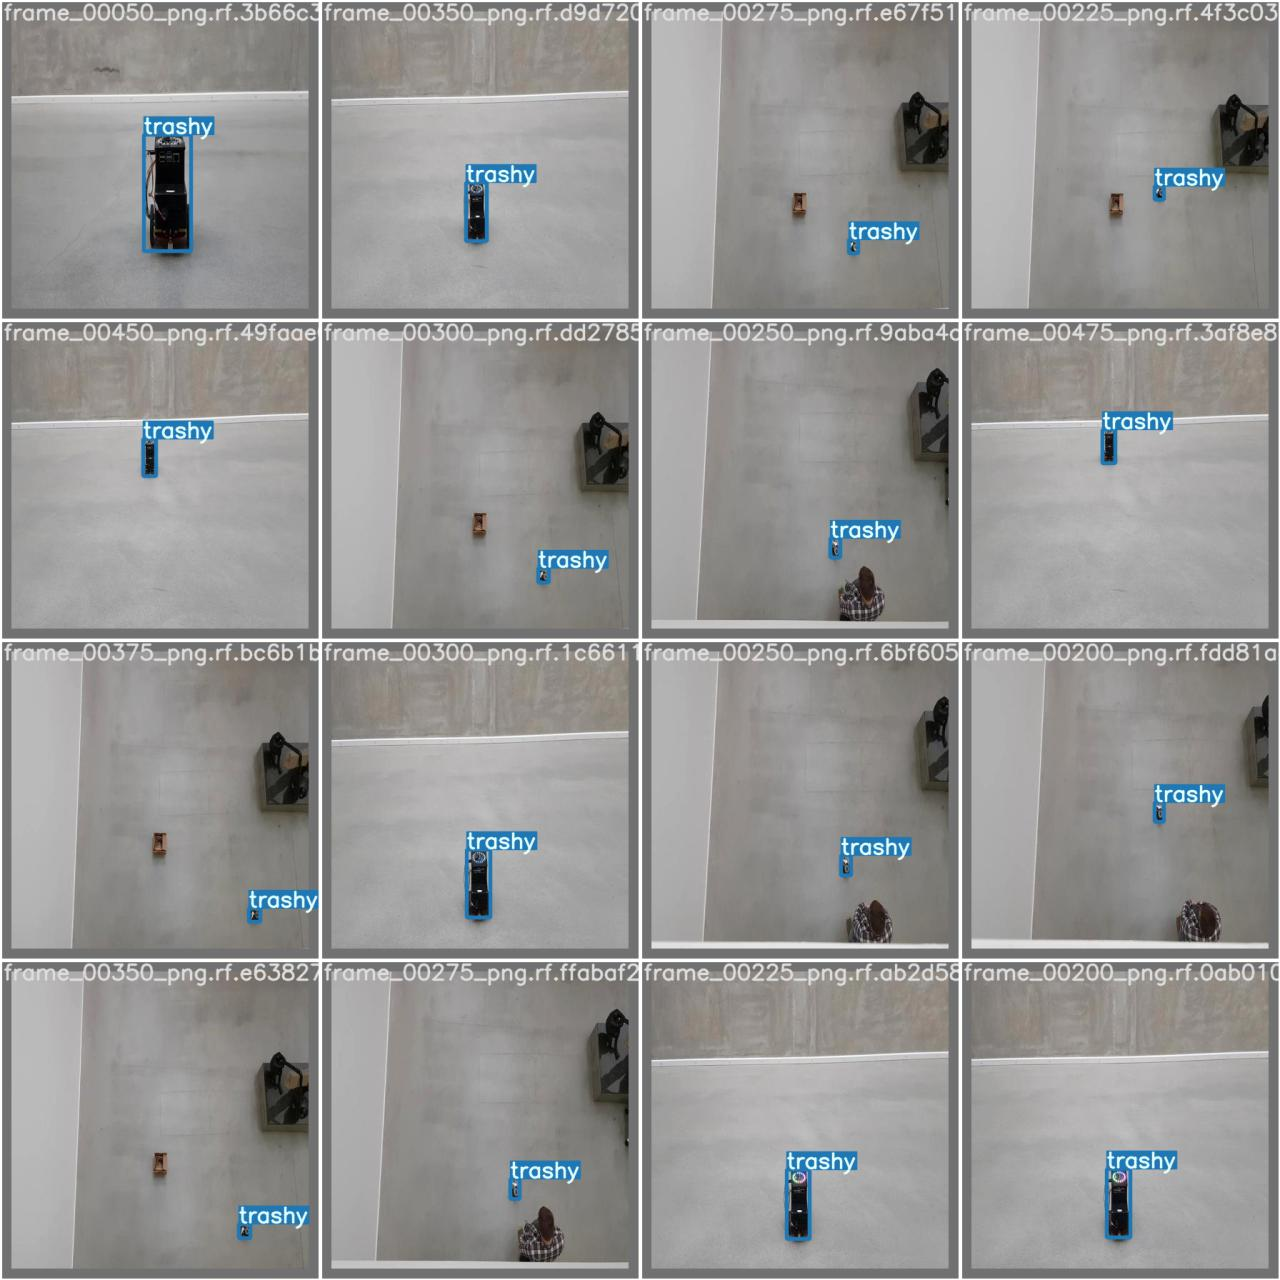

In [6]:
Image(filename='runs/train/trashy/test_batch0_labels.jpg', width=800)

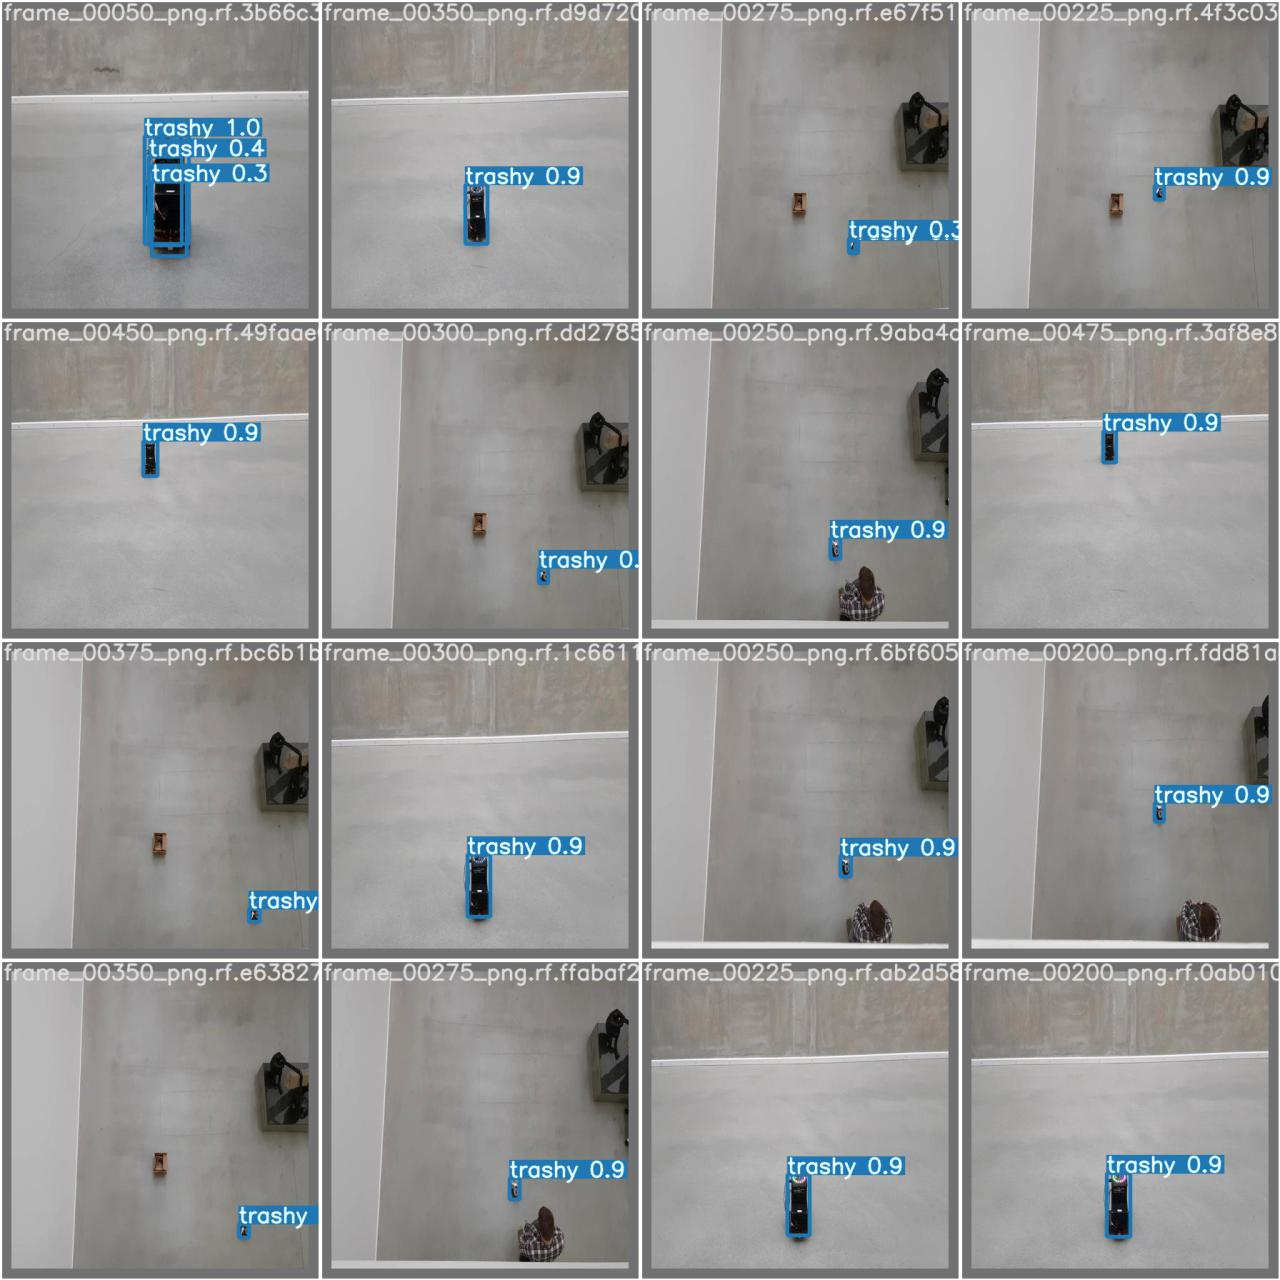

In [7]:
Image(filename='runs/train/trashy/test_batch0_pred.jpg', width=800)

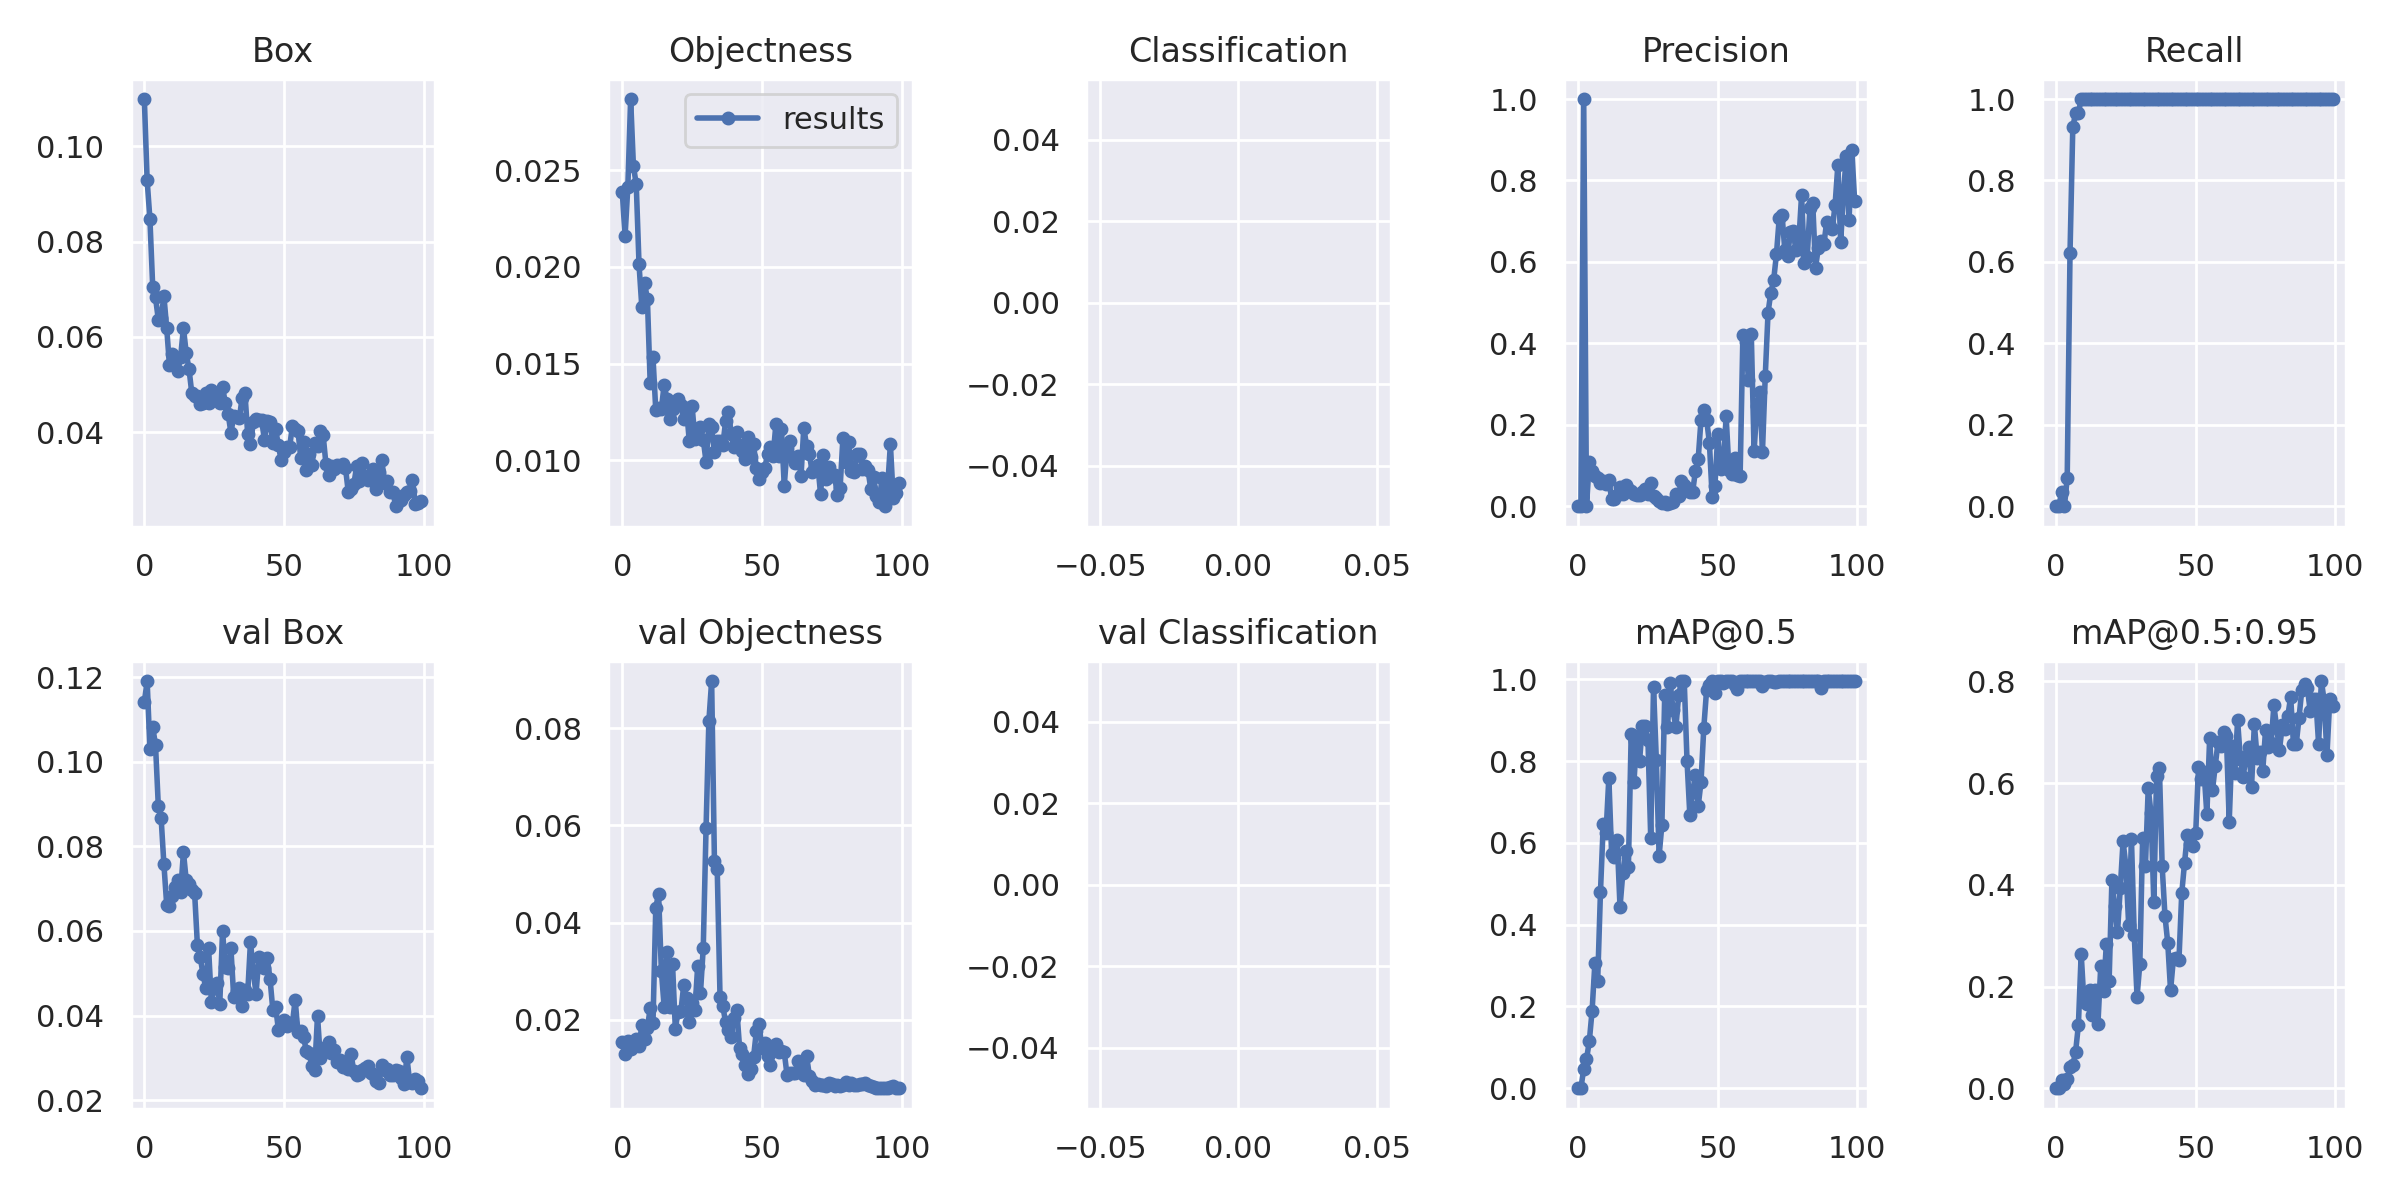

In [8]:
Image(filename='runs/train/trashy/results.png', width=800)